# **Retrieval Augmented Generation (RAG)**

## **Why do we need RAG?**

* LLMs have the following limitations:
    - They can't access private data.
    - They can't answer about events which happened after the cut-off date of their pretraining data.
    - In short, their parametric knowledge is limited to pretraining data.
    - They tend to hallucinate and confidently generate wrong information.

* How can we solve the above issues?
    - LLM Fine tuning - Computationally expensive and needs deep expertise.
    - In Context Learning (ICL) - Heavily dependent on prompt engineering and exemplar selection.
    - Retrieval Augmented Generation (RAG) - Cheaper and safer.

## **What are the Componenets of RAG?**

**Indexing**

* Document Ingestion
* Chunking
* Embeddings
* Vector Store



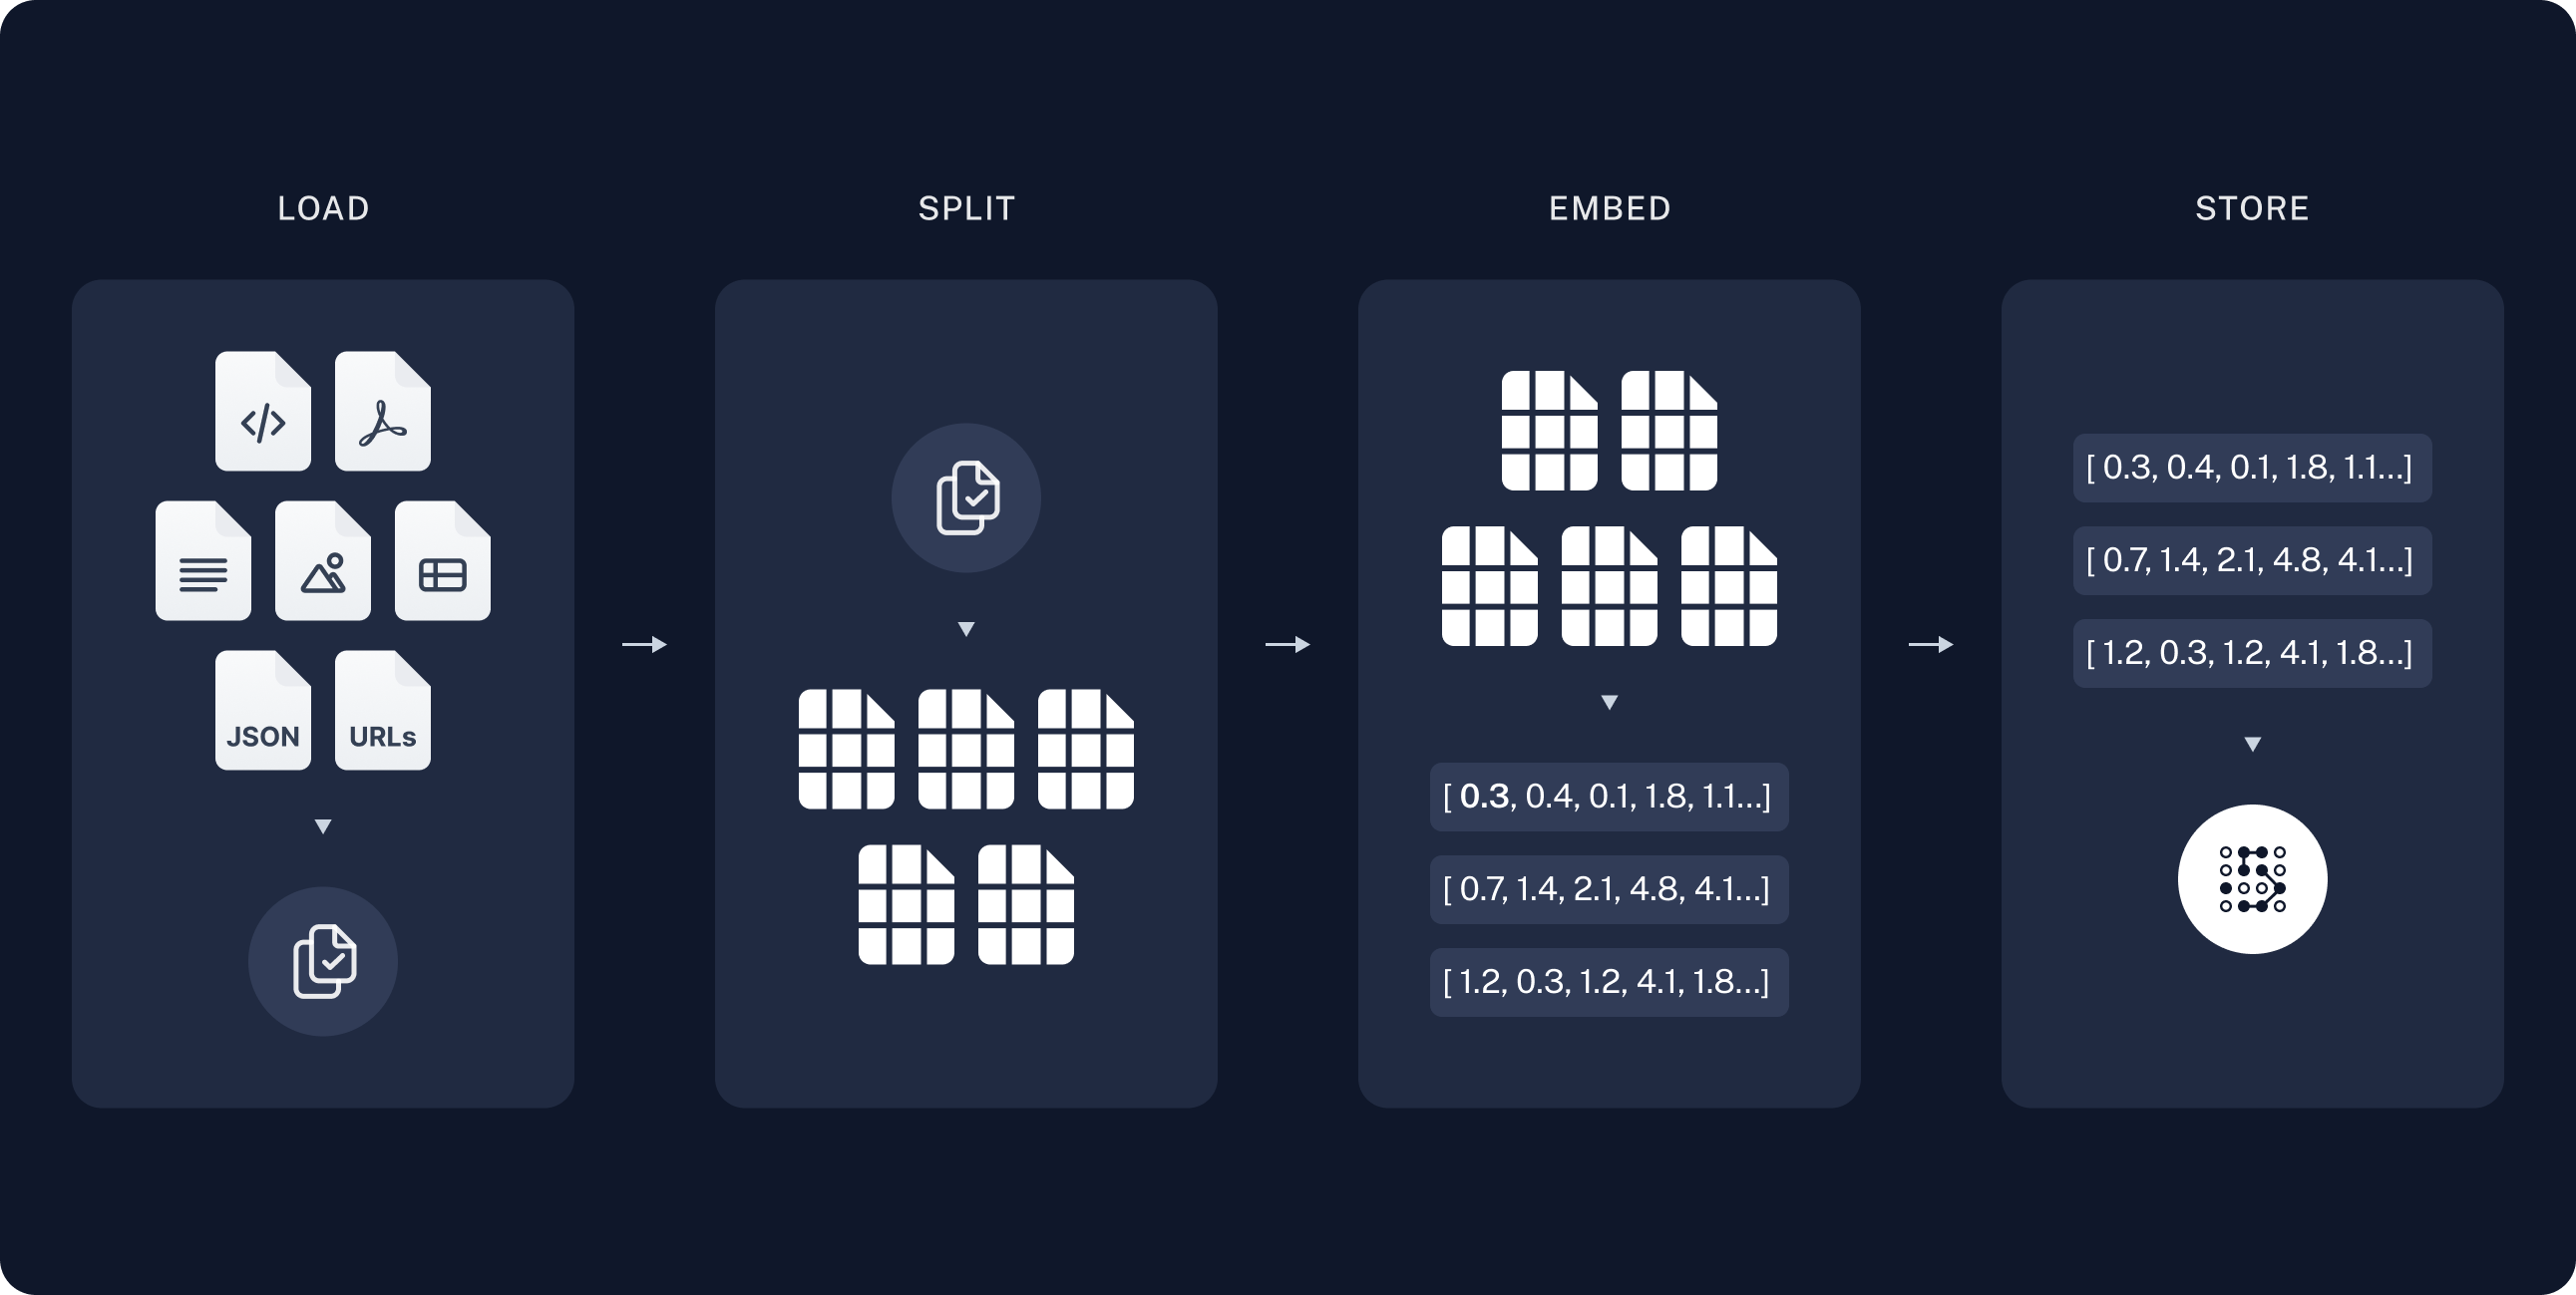



* **Retrieval**
    - Query embedding
    - Semantic Search
    - Ranking

* **Augmentation**
* **Generation**



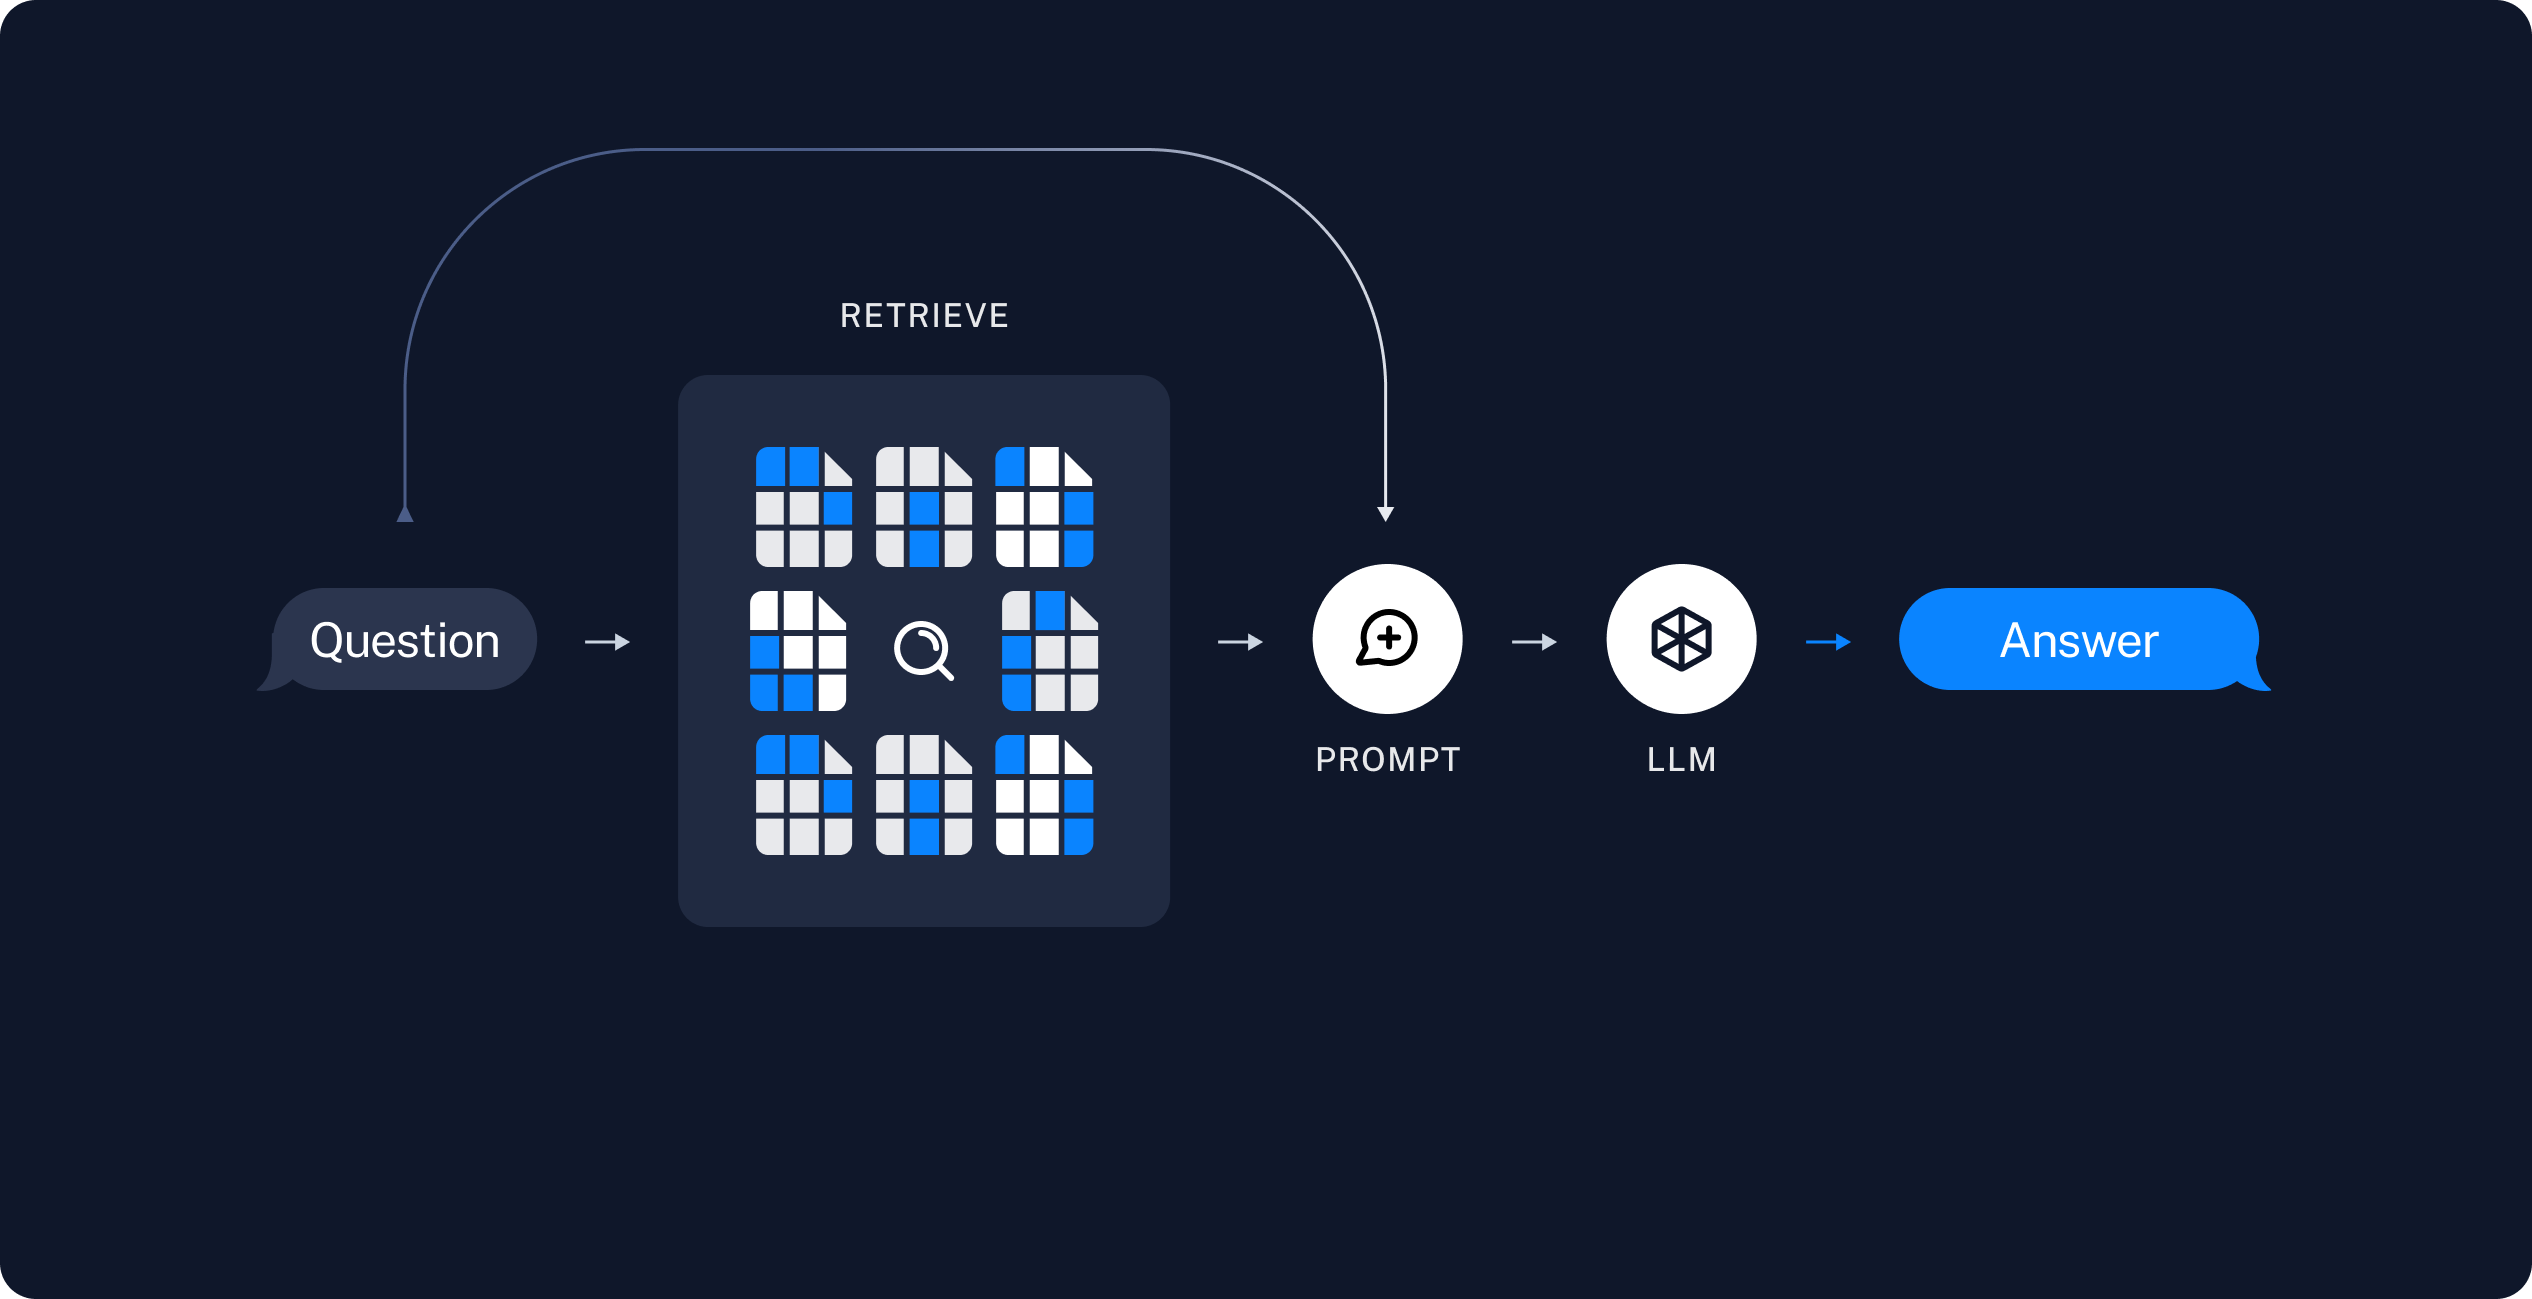

## **What is LangChain?**

LangChain is a framework for developing applications powered by large language models (LLMs). LangChain implements a standard interface for LLMs and related technologies, such as embedding models and vector stores, and integrates with hundreds of providers. It helps AI developers connect LLMs such as GPT-4 with external data and computation.

Key benefits include:

1. **Modular Workflow**: Simplifies chaining LLMs together for reusable and efficient workflows.
2. **Prompt Management**: Offers tools for effective prompt engineering and memory handling.
3. **Ease of Integration**: Streamlines the process of building LLM-powered applications.











### **Components of LangChain**

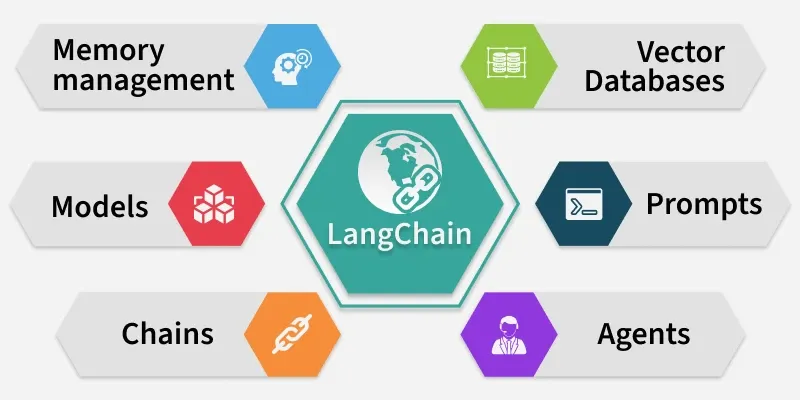

1. **Chains**: Chains define sequences of actions, where each step can involve querying an LLM, manipulating data or interacting with external tools. There are two types:

2. **Prompt Management**: LangChain facilitates managing and customizing prompts passed to the LLM. Developers can use **PromptTemplates** to define how inputs and outputs are formatted before being passed to the model. It also simplifies tasks like handling dynamic variables and prompt engineering, making it easier to control the LLM's behavior.

3. **Agents**: Agents are autonomous systems within LangChain that take actions based on input data. They can call external APIs or query databases dynamically, making decisions based on the situation. These agents leverage LLMs for decision-making, allowing them to respond intelligently to changing input.

4. **Vector Database**: LangChain integrates with a vector database which is used to store and search high-dimensional vector representations of data. This is important for performing similarity searches, where the LLM converts a query into a vector and compares it against the vectors in the database to retrieve relevant information.

5. **Models**: LangChain is model-agnostic meaning it can integrate with different LLMs such as OpenAI's GPT, Hugging Face models, DeepSeek R1 and more. This flexibility allows developers to choose the best model for their use case while benefiting from LangChain’s architecture.

6. **Memory Management**: LangChain supports memory management allowing the LLM to "remember" context from previous interactions. This is especially useful for creating conversational agents that need context across multiple inputs. The memory allows the model to handle sequential conversations, keeping track of prior exchanges to ensure the system responds appropriately.

## **What is FAISS?**

**Facebook AI Similarity Search** (FAISS) is a library for efficient similarity search and clustering of dense vectors. It contains algorithms that search in sets of vectors of any size, up to ones that possibly do not fit in RAM. FAISS achieves speed and efficiency by using techniques like indexing (e.g., Inverted File Index) and quantization (e.g., Product Quantization) to organize and compress vectors.

## **FAISS Vs ChromaDB**

FAISS and ChromaDB are both libraries that serve the purpose of managing and querying large-scale vector databases, but they have different focuses and characteristics.



*   **ChromaDB** is specifically designed for managing and searching large-scale color data, particularly in the context of computer vision and image processing. It is optimized for working with color histograms and other color-based representations.
    - Use Case: ChromaDB is commonly used in applications where color plays a crucial role, such as image and video processing, where similarity searches based on color are essential.
*   **FAISS** is a more general-purpose library designed for similarity search in large-scale vector databases. It is not limited to any specific type of data and can be applied to a wide range of applications. It is highly optimized for speed and memory usage, making it suitable for handling large datasets efficiently.
    - Use Case: FAISS is widely used in applications where similarity search is critical, such as recommendation systems, natural language processing, and image retrieval. Its versatility makes it suitable for handling different types of vector data.





## **Building a Youtube ChatBot**

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "your-openai-key"

### **Install libraries**

In [ ]:
!pip install -q youtube-transcript-api langchain-community langchain-huggingface langchain-ollama \
               faiss-cpu tiktoken python-dotenv

# !pip install langchain-openai

In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi, TranscriptsDisabled
from langchain.text_splitter import RecursiveCharacterTextSplitter
# from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_ollama import OllamaEmbeddings, ChatOllama
from langchain_community.vectorstores import FAISS
from langchain_core.prompts import PromptTemplate

### **Install Ollama and Pull Required LLMs and Embedding Models**

In [ ]:
!curl -fsSL https://ollama.com/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
import subprocess
import threading

def ollama_serve():
    subprocess.run(["ollama", "serve"])

ollama_thread = threading.Thread(target=ollama_serve)
ollama_thread.start()

In [ ]:
!ollama pull nomic-embed-text

In [ ]:
!ollama pull llama3.2:1b

In [ ]:
!ollama pull deepseek-r1:1.5b

In [ ]:
!ollama pull qwen3:1.7b

### **Step 1a - Indexing (Document Ingestion)**

In [ ]:
video_id = "giT0ytynSqg" # only the ID, not full URL
try:
    # If you don’t care which language, this returns the “best” one
    ytt_api = YouTubeTranscriptApi()
    transcript_list = ytt_api.fetch(video_id=video_id, languages=["en"])
    transcript_list = transcript_list.to_raw_data()

    # Flatten it to plain text
    transcript = " ".join(chunk["text"] for chunk in transcript_list)
    print(transcript)

except TranscriptsDisabled:
    print("No captions available for this video.")

the following is a conversation with demus hasabis ceo and co-founder of deepmind a company that has published and builds some of the most incredible artificial intelligence systems in the history of computing including alfred zero that learned all by itself to play the game of gold better than any human in the world and alpha fold two that solved protein folding both tasks considered nearly impossible for a very long time demus is widely considered to be one of the most brilliant and impactful humans in the history of artificial intelligence and science and engineering in general this was truly an honor and a pleasure for me to finally sit down with him for this conversation and i'm sure we will talk many times again in the future this is the lex friedman podcast to support it please check out our sponsors in the description and now dear friends here's demis hassabis let's start with a bit of a personal question am i an ai program you wrote to interview people until i get good enough 

In [ ]:
transcript_list[:10]

[{'text': 'the following is a conversation with',
  'start': 0.08,
  'duration': 3.44},
 {'text': 'demus hasabis', 'start': 1.76, 'duration': 4.96},
 {'text': 'ceo and co-founder of deepmind', 'start': 3.52, 'duration': 5.119},
 {'text': 'a company that has published and builds',
  'start': 6.72,
  'duration': 4.48},
 {'text': 'some of the most incredible artificial',
  'start': 8.639,
  'duration': 4.561},
 {'text': 'intelligence systems in the history of',
  'start': 11.2,
  'duration': 4.8},
 {'text': 'computing including alfred zero that',
  'start': 13.2,
  'duration': 3.68},
 {'text': 'learned', 'start': 16.0, 'duration': 2.96},
 {'text': 'all by itself to play the game of gold',
  'start': 16.88,
  'duration': 4.559},
 {'text': 'better than any human in the world and',
  'start': 18.96,
  'duration': 5.6}]

### **Step 1b - Indexing (Text Splitting)**

In [ ]:
splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
chunks = splitter.create_documents([transcript])

In [ ]:
len(chunks)

168

In [ ]:
chunks[100]

Document(metadata={}, page_content="and and kind of come up with descriptions of the electron clouds where they're gonna go how they're gonna interact when you put two elements together uh and what we try to do is learn a simulation uh uh learner functional that will describe more chemistry types of chemistry so um until now you know you can run expensive simulations but then you can only simulate very small uh molecules very simple molecules we would like to simulate large materials um and so uh today there's no way of doing that and we're building up towards uh building functionals that approximate schrodinger's equation and then allow you to describe uh what the electrons are doing and all materials sort of science and material properties are governed by the electrons and and how they interact so have a good summarization of the simulation through the functional um but one that is still close to what the actual simulation would come out with so what um how difficult is that to ask w

### **Step 1c & 1d - Indexing (Embedding Generation and Storing in Vector Store)**

In [ ]:
# embeddings = OpenAIEmbeddings(model="text-embedding-3-small")
embeddings = OllamaEmbeddings(model='nomic-embed-text')

vector_store = FAISS.from_documents(chunks, embeddings)

In [ ]:
vector_store.index_to_docstore_id

{0: '2f0109cd-364f-4ec1-9278-22ac570b5314',
 1: 'd2e41b2d-8f11-4d03-a9a6-65efd2de1c62',
 2: 'ec03cbf7-3973-40cf-8276-545903e8159f',
 3: 'fd67b32b-e120-4679-ae89-03bd01f3ebb3',
 4: '91866cb4-1c79-466a-9888-9bb6cc305376',
 5: 'bcab4d7f-0b9b-4960-aa56-71f9bb5696cc',
 6: 'da70c040-eb9f-4574-a772-aa127248ef2b',
 7: 'b84e0bba-0bec-49d7-9ea3-a11b6c273e08',
 8: '26351d58-7548-431b-8487-1f1064462eac',
 9: '2cde941c-3709-4c37-928b-ce979a46f360',
 10: '3df07d01-23c6-4431-8aa4-7d93a0cbf725',
 11: '73470660-2b1d-4d48-9f4b-3cec7b7e673a',
 12: 'ff90852a-7188-43f0-8f62-ef743ac5645b',
 13: '7df8c4b6-3dce-4868-9572-6360dd20d755',
 14: '6619b19d-d6fa-4358-ae63-adf581efe415',
 15: '6c59a8bb-a043-4ec2-8101-7eee675fdec1',
 16: '4f0c5896-414a-47a6-b29a-2edc0ecb6fcc',
 17: 'ececc288-2d03-4587-90ef-8f76e832bf0b',
 18: '6824c7fc-2f3e-4729-b5c2-7fb22abf8cb9',
 19: '45d203bb-cfac-4eba-ac49-f5e70ca89759',
 20: '6e4f4563-fd38-4c43-8349-a08329a46c28',
 21: 'ea647c47-796e-4ca9-9449-0d4ba1c6a43a',
 22: 'f25cd863-4d7d-

In [ ]:
vector_store.get_by_ids(['8f301150-ceb2-4109-b57c-4196c8b7538e'])

[Document(id='8f301150-ceb2-4109-b57c-4196c8b7538e', metadata={}, page_content="i'll be a bit tired and i won't be my best but that's fine i can decide looking at my schedule the next day that and given where i'm at with this particular thought or creative idea that i'm going to pay that cost the next day so so i think that's that's more flexible than morning people who do that you know they get up at four in the morning they can also do those golden hours then but then their start of their schedule day starts at breakfast you know 8 a.m whatever they have their first meeting and then it's hard you have to reschedule a day if you're in flow yeah that's going to be i don't have to see that special threat of thoughts that the you're too passionate about you that this is where some of the greatest ideas could potentially come is when you just lose yourself late into yeah and for the meetings i mean you're loading in really hard problems in a very short amount of time so you have to do som

### **Step 2 - Retrieval**

In [ ]:
retriever = vector_store.as_retriever(search_type="similarity", search_kwargs={"k": 4})

In [ ]:
retriever

VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x7fb1036d1fd0>, search_kwargs={'k': 10})

In [ ]:
retriever.invoke('What is deepmind')

[Document(id='deab0c48-1361-4cb6-85bd-8ae3c0814a15', metadata={}, page_content='i used to discuss um uh uh what were the sort of founding tenets of deep mind and it was very various things one was um algorithmic advances so deep learning you know jeff hinton and cohen just had just sort of invented that in academia but no one in industry knew about it uh we love reinforcement learning we thought that could be scaled up but also understanding about the human brain had advanced um quite a lot uh in the decade prior with fmri machines and other things so we could get some good hints about architectures and algorithms and and sort of um representations maybe that the brain uses so as at a systems level not at a implementation level um and then the other big things were compute and gpus right so we could see a compute was going to be really useful and it got to a place where it became commoditized mostly through the games industry and and that could be taken advantage of and then the final 

### **Step 3 - Augmentation**

In [ ]:
# llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.2)

# llm = ChatOllama(model="llama3.2:1b")
# llm = ChatOllama(model="deepseek-r1:1.5b")
llm = ChatOllama(model="qwen3:1.7b")

In [ ]:
prompt = PromptTemplate(
    template="""
      You are a helpful assistant.
      Answer ONLY from the provided transcript context.
      If the context is insufficient, just say you don't know.

      {context}
      Question: {question}
    """,
    input_variables = ['context', 'question']
)

In [ ]:
question          = "is the topic of nuclear fusion discussed in this video? if yes then what was discussed"
retrieved_docs    = retriever.invoke(question)

In [ ]:
retrieved_docs

[Document(id='57bf98c2-bf3e-457c-8e64-1a3503e6e69b', metadata={}, page_content='that i would like to i think could be very transformative if we helped accelerate and uh really interesting problems scientific challenges in of themselves this is energy so energy yes exactly so energy and climate so we talked about disease and biology as being one of the biggest places i think ai can help with i think energy and climate uh is another one so maybe they would be my top two um and fusion is one one area i think ai can help with now fusion has many challenges mostly physics material science and engineering challenges as well to build these massive fusion reactors and contain the plasma and what we try to do whenever we go into a new field to apply our systems is we look for um we talk to domain experts we try and find the best people in the world to collaborate with um in this case in fusion we we collaborated with epfl in switzerland the swiss technical institute who are amazing they have a 

In [ ]:
context_text = "\n\n".join(doc.page_content for doc in retrieved_docs)
context_text

"that i would like to i think could be very transformative if we helped accelerate and uh really interesting problems scientific challenges in of themselves this is energy so energy yes exactly so energy and climate so we talked about disease and biology as being one of the biggest places i think ai can help with i think energy and climate uh is another one so maybe they would be my top two um and fusion is one one area i think ai can help with now fusion has many challenges mostly physics material science and engineering challenges as well to build these massive fusion reactors and contain the plasma and what we try to do whenever we go into a new field to apply our systems is we look for um we talk to domain experts we try and find the best people in the world to collaborate with um in this case in fusion we we collaborated with epfl in switzerland the swiss technical institute who are amazing they have a test reactor that they were willing to let us use which you know i double\n\nin

In [ ]:
final_prompt = prompt.invoke({"context": context_text, "question": question})

In [ ]:
final_prompt

StringPromptValue(text="\n      You are a helpful assistant.\n      Answer ONLY from the provided transcript context.\n      If the context is insufficient, just say you don't know.\n\n      that i would like to i think could be very transformative if we helped accelerate and uh really interesting problems scientific challenges in of themselves this is energy so energy yes exactly so energy and climate so we talked about disease and biology as being one of the biggest places i think ai can help with i think energy and climate uh is another one so maybe they would be my top two um and fusion is one one area i think ai can help with now fusion has many challenges mostly physics material science and engineering challenges as well to build these massive fusion reactors and contain the plasma and what we try to do whenever we go into a new field to apply our systems is we look for um we talk to domain experts we try and find the best people in the world to collaborate with um in this case i

### **Step 4 - Generation**

In [ ]:
answer = llm.invoke(final_prompt)
print(answer.content)

<think>
Okay, let's see. The user is asking if the topic of nuclear fusion is discussed in the video and, if so, what was discussed.

First, I need to look through the provided transcript to find any mentions of nuclear fusion. The user provided a long transcript with various topics like energy, climate, AI, fusion, and even some philosophical discussions. 

Looking through the transcript, there are several mentions of fusion. For example, the speaker talks about using AI to help with fusion, collaborating with EPFL in Switzerland, a test reactor, and specific problems like controlling plasma with reinforcement learning. There's also a mention of a paper published in Nature about magnetic control of tokamak plasmas using deep reinforcement learning. The speaker also discusses the challenges in fusion, such as physics, material science, and engineering, and how AI can address these challenges.

So, the answer should confirm that the topic of nuclear fusion is discussed and outline the k

### **Building a Chain**

In [ ]:
from langchain_core.runnables import RunnableParallel, RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser

In [ ]:
def format_docs(retrieved_docs):
  context_text = "\n\n".join(doc.page_content for doc in retrieved_docs)
  return context_text

In [ ]:
parallel_chain = RunnableParallel({
    'context': retriever | RunnableLambda(format_docs),
    'question': RunnablePassthrough()
})

In [ ]:
parallel_chain.invoke('who is Demis')

{'context': "out our sponsors in the description and now dear friends here's demis hassabis let's start with a bit of a personal question am i an ai program you wrote to interview people until i get good enough to interview you well i'll be impressed if if you were i'd be impressed by myself if you were i don't think we're quite up to that yet but uh maybe you're from the future lex if you did would you tell me is that is that a good thing to tell a language model that's tasked with interviewing that it is in fact um ai maybe we're in a kind of meta turing test uh probably probably it would be a good idea not to tell you so it doesn't change your behavior right this is a kind of heisenberg uncertainty principle situation if i told you you behave differently yeah maybe that's what's happening with us of course this is a benchmark from the future where they replay 2022 as a year before ais were good enough yet and now we want to see is it going to pass exactly if i was such a program wou

In [ ]:
parser = StrOutputParser()

In [ ]:
main_chain = parallel_chain | prompt | llm | parser

In [ ]:
main_chain.invoke('Can you summarize the video')

"<think>\nOkay, the user is asking to summarize the video. Let me look at the provided transcript.\n\nThe transcript starts with the assistant discussing how to explain complex concepts, like the standard model of physics, and how simulations can be used to understand electron behavior. It mentions using functionals to approximate Schrödinger's equation and how this relates to chemistry and materials science. There's a part about using games to generate data for simulations and the importance of learning from that data. The assistant also talks about protein folding and the challenge of predicting 3D structures from amino acid sequences. The conversation ends with discussions about AI and generalizability, testing AI on various tasks.\n\nThe key points are: using simulations and functionals to model physics and chemistry, the difficulty of predicting molecular structures, the role of data generation in AI, and the importance of generalization in AI systems. The assistant also mentions 

## **Chat MyPDF**

RAG PDF Dataset: https://github.com/laxmimerit/rag-dataset

### **Install Libraries**

In [ ]:
!pip install -U langchain-community faiss-cpu langchain-huggingface pymupdf tiktoken langchain-ollama python-dotenv

In [ ]:
import os
import warnings
from dotenv import load_dotenv

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
warnings.filterwarnings("ignore")

load_dotenv()

True

In [ ]:
os.environ['LANGCHAIN_PROJECT']

'chat_myPDF'

### **Document Loader**

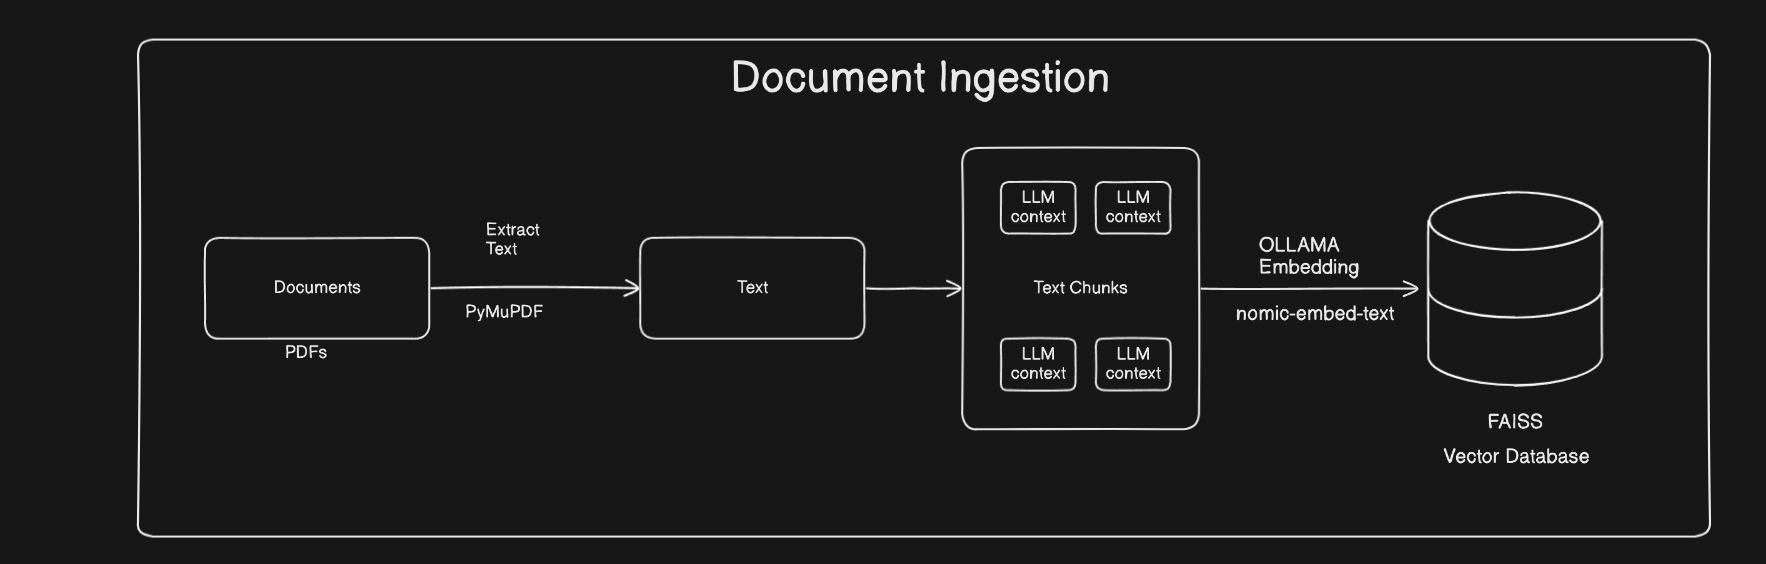

In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader("/content/rag_dataset/gym_supplements/1. Analysis of Actual Fitness Supplement.pdf")

docs = loader.load()

In [ ]:
doc = docs[0]
print(doc.metadata)
print('\n\n')
print(doc.page_content)

{'producer': 'iLovePDF', 'creator': '', 'creationdate': '', 'source': '/content/rag_dataset/health_supplements/1. dietary supplements - for whom.pdf', 'file_path': '/content/rag_dataset/health_supplements/1. dietary supplements - for whom.pdf', 'total_pages': 17, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2024-10-21T11:37:54+00:00', 'trapped': '', 'modDate': 'D:20241021113754Z', 'creationDate': '', 'page': 0}



International  Journal  of
Environmental Research
and Public Health
Review
Dietary Supplements—For Whom? The Current State of
Knowledge about the Health Effects of Selected
Supplement Use
Regina Ewa Wierzejska


Citation: Wierzejska, R.E. Dietary
Supplements—For Whom? The
Current State of Knowledge about the
Health Effects of Selected Supplement
Use. Int. J. Environ. Res. Public Health
2021, 18, 8897. https://doi.org/
10.3390/ijerph18178897
Academic Editor: Paul B. Tchounwou
Received: 15 July 2021
Accepted: 21 Augu

In [ ]:
import os

pdfs = []
for root, dirs, files in os.walk('/content/rag_dataset'):
    print(root, dirs, files)
    for file in files:
        if file.endswith('.pdf'):
            pdfs.append(os.path.join(root, file))

/content/rag_dataset ['health_supplements', 'gym_supplements', '.ipynb_checkpoints'] []
/content/rag_dataset/health_supplements [] ['1. dietary supplements - for whom.pdf', '2. Nutraceuticals research.pdf', '3.health_supplements_side_effects.pdf']
/content/rag_dataset/gym_supplements [] ['2. High Prevalence of Supplement Intake.pdf', '1. Analysis of Actual Fitness Supplement.pdf']
/content/rag_dataset/.ipynb_checkpoints [] []


In [ ]:
pdfs

['/content/rag_dataset/health_supplements/1. dietary supplements - for whom.pdf',
 '/content/rag_dataset/health_supplements/2. Nutraceuticals research.pdf',
 '/content/rag_dataset/health_supplements/3.health_supplements_side_effects.pdf',
 '/content/rag_dataset/gym_supplements/2. High Prevalence of Supplement Intake.pdf',
 '/content/rag_dataset/gym_supplements/1. Analysis of Actual Fitness Supplement.pdf']

In [ ]:
docs = []
for pdf in pdfs:
    loader = PyMuPDFLoader(pdf)
    pages = loader.load()

    docs.extend(pages)

In [ ]:
len(docs)

64

### **Document Chunking**

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)

chunks = text_splitter.split_documents(docs)

In [ ]:
len(docs), len(chunks)

(64, 311)

In [ ]:
len(docs[0].page_content), len(chunks[0].page_content)

(4490, 946)

In [ ]:
import tiktoken

encoding = tiktoken.encoding_for_model("gpt-4o-mini")

len(encoding.encode(docs[0].page_content)), len(encoding.encode(chunks[0].page_content))

(1016, 271)

### **Document Vector Embedding**

In [ ]:
from langchain_ollama import OllamaEmbeddings

import faiss
from langchain_community.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore

In [ ]:
embeddings = OllamaEmbeddings(model='nomic-embed-text')
single_vector = embeddings.embed_query("this is some text data")


In [ ]:
len(single_vector)

768

In [ ]:
index = faiss.IndexFlatL2(len(single_vector))
index.ntotal, index.d

(0, 768)

In [ ]:
vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={}
)

In [ ]:
len(chunks)

311

In [ ]:
# help(vector_store)

In [ ]:
ids = vector_store.add_documents(documents=chunks)

In [ ]:
len(ids)

311

In [ ]:
vector_store.index_to_docstore_id

{0: '3e516ec1-a6ca-48b5-b7be-b21f4bf593b7',
 1: 'dce3c280-62c9-4515-886b-fa9ce78cd8ee',
 2: '78643a28-cbd9-4226-b5a8-eee3669dac20',
 3: 'ba5b088d-225a-46ae-90be-f88a65ab2fb2',
 4: '18a1421d-5de1-43bc-a8b1-c4474b62fb5e',
 5: '25aed640-9910-4989-98e4-a654491a6ed6',
 6: 'f768a74b-0eeb-48ec-93ba-1ad9b48aac1f',
 7: 'f579ae7b-1653-4c1a-a44f-f69742128b9c',
 8: '2207f616-99fa-4fce-8fa4-6548dd94cfaa',
 9: '1e369a82-45be-4c6b-abc1-60308de693b5',
 10: '47e34b21-75e4-400d-a323-9773428677ea',
 11: '55ad2f52-41ab-4769-9ad4-aa44fa156b50',
 12: '2826af6b-e571-4317-9d45-bce47b4a63b7',
 13: '6ef2ca8d-8595-40c8-850e-7cb189e8dba6',
 14: '48499c5a-1f61-4308-a1d0-d072613c2bf6',
 15: '3bfea402-bf89-4784-a508-d4caedb2a539',
 16: '274d6029-66ff-44e6-95ee-99e9ded52021',
 17: '90226e7b-9216-4e3a-83e8-11f0ab835aa7',
 18: '046b5630-2731-4801-a0bb-bf33f11be5a3',
 19: 'cc777c28-46f8-4061-9a7e-5b2f3661ce6f',
 20: '3888f4ec-ac8c-4346-8d13-ba990980198d',
 21: '46cac0bb-aa81-4d34-bf30-58678258bd4e',
 22: '0d7976bc-043e-

In [ ]:
# # store vector database
db_name = "health_supplements"
vector_store.save_local(db_name)

# load vector database
new_vector_store = FAISS.load_local(db_name, embeddings=embeddings, allow_dangerous_deserialization=True)
len(new_vector_store.index_to_docstore_id)

311

### **Retreival**

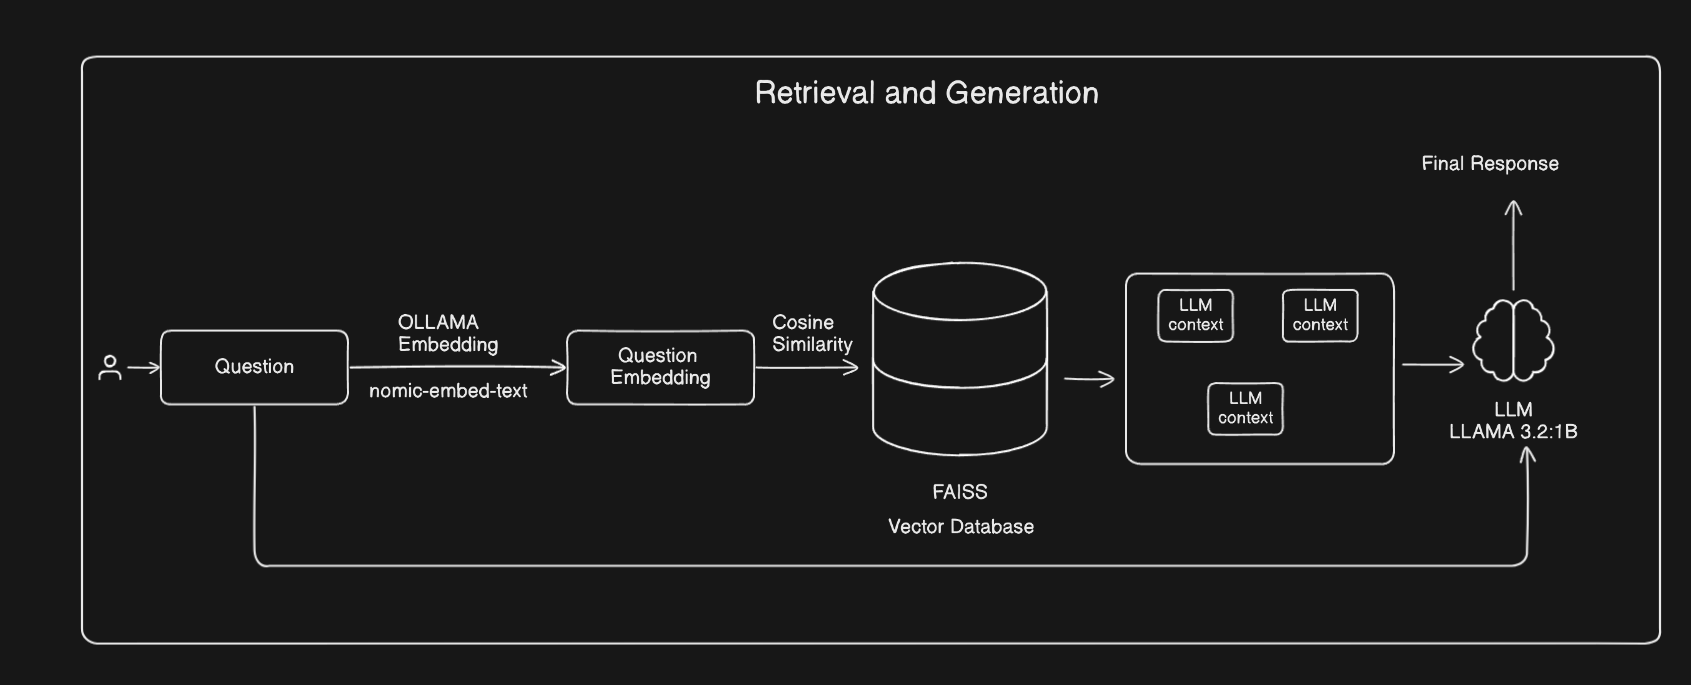

In [ ]:
question = "what is used to gain muscle mass?"
docs = vector_store.search(query=question, search_type='similarity')

for doc in docs:
    print(doc.page_content)
    print("\n\n")

acids than traditional protein sources. Its numerous benefits have made it a popular choice
for snacks and drinks among consumers [3]. Another widely embraced supplement is
caffeine, which is found in many sports and food supplements. Caffeine reduces perceived
effort, minimizes fatigue and pain, and proves to be effective for endurance and high-
intensity activities, which is the choice of consumers [4].
Creatine monohydrate is another well-known supplement used to gain muscle mass
and support performance and recovery. It is known not to increase fat mass and remains
effective even when taken in recommended doses [5]. Despite its popularity in the fitness
Foods 2024, 13, 1424. https://doi.org/10.3390/foods13091424
https://www.mdpi.com/journal/foods



and strength gain among men. We detected more prevalent protein and creatine supplementation
among younger compared to older ﬁtness center users, whereas the opposite was found for vitamin
supplementation. Other authors made similar obse

In [ ]:
retriever = vector_store.as_retriever(search_type="mmr", search_kwargs = {'k': 3,
                                                                          'fetch_k': 100,
                                                                          'lambda_mult': 1})

In [ ]:
docs = retriever.invoke(question)

for doc in docs:
    print(doc.page_content)
    print("\n\n")


acids than traditional protein sources. Its numerous benefits have made it a popular choice
for snacks and drinks among consumers [3]. Another widely embraced supplement is
caffeine, which is found in many sports and food supplements. Caffeine reduces perceived
effort, minimizes fatigue and pain, and proves to be effective for endurance and high-
intensity activities, which is the choice of consumers [4].
Creatine monohydrate is another well-known supplement used to gain muscle mass
and support performance and recovery. It is known not to increase fat mass and remains
effective even when taken in recommended doses [5]. Despite its popularity in the fitness
Foods 2024, 13, 1424. https://doi.org/10.3390/foods13091424
https://www.mdpi.com/journal/foods



and strength gain among men. We detected more prevalent protein and creatine supplementation
among younger compared to older ﬁtness center users, whereas the opposite was found for vitamin
supplementation. Other authors made similar obse

In [ ]:
# question = "what is used to reduce weight?"
# question = "what are side effects of supplements?"
# question = "what are the benefits of supplements?"
question = "what are the benefits of BCAA supplements?"
docs = retriever.invoke(question)


### **RAG with Llama 3.2 on Ollama**

In [ ]:
from langchain import hub
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_core.prompts import ChatPromptTemplate

from langchain_ollama import ChatOllama

In [ ]:
model = ChatOllama(model="llama3.2:1b")

model.invoke("hi")

AIMessage(content='How can I help you today?', additional_kwargs={}, response_metadata={'model': 'llama3.2:1b', 'created_at': '2025-09-12T19:18:45.300766749Z', 'done': True, 'done_reason': 'stop', 'total_duration': 2823745644, 'load_duration': 2557547937, 'prompt_eval_count': 26, 'prompt_eval_duration': 151669220, 'eval_count': 8, 'eval_duration': 113336614, 'model_name': 'llama3.2:1b'}, id='run--a8e61242-339d-464f-90a1-203ccfd5629a-0', usage_metadata={'input_tokens': 26, 'output_tokens': 8, 'total_tokens': 34})

In [ ]:
prompt = hub.pull("rlm/rag-prompt")

In [ ]:
prompt = """
    You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question.
    If you don't know the answer, just say that you don't know.
    Answer in bullet points. Make sure your answer is relevant to the question and it is answered from the context only.
    Question: {question}
    Context: {context}
    Answer:
"""

prompt = ChatPromptTemplate.from_template(prompt)
prompt

ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="\n    You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question.\n    If you don't know the answer, just say that you don't know.\n    Answer in bullet points. Make sure your answer is relevant to the question and it is answered from the context only.\n    Question: {question} \n    Context: {context} \n    Answer:\n"), additional_kwargs={})])

In [ ]:
def format_docs(docs):
    return "\n\n".join([doc.page_content for doc in docs])

print(format_docs(docs))

Foods 2024, 13, 1424
2 of 21
and sports industry, evidence suggests that creatine can benefit not only athletes but also
the elderly and the general population [6]. Branched-chain amino acids (BCAA) also offer
a plethora of benefits for consumers. As explained by Sanz et al. [7], BCAAs are stored
directly in muscles and serve as the raw materials needed to build new muscle. This
contributes to the overall process of strengthening muscles and alleviating post-workout
soreness. Consumers often integrate these supplements into their routines with the aim of
optimizing the outcomes they wish to achieve and support overall well-being [1].
The sports supplement industry makes for an impressive market share of nearly
$12 billion in the health/wellness portfolio and is projected to be worth $24.4 billion
by 2025. In a study by Burke [4], which investigated 20 published studies about the
prevalence, methods, and reasons for supplement consumption, it is evident from the

Attribution (CC BY) lic

In [ ]:
rag_chain = (
    {"context": retriever|format_docs, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

In [ ]:
# question = "what is used to gain muscle mass?"
# question = "what is used to reduce weight?"
# question = "what are side effects of supplements?"
# question = "what are the benefits of supplements?"
# question = "what are the benefits of BCAA supplements?"

question = "what is used to increase mass of the Earth?"

output = rag_chain.invoke(question)
print(output)


Here are the answers to the question "What is used to increase mass of the Earth?" in bullet points:

* There is no mention of using any specific component or substance to increase the mass of the Earth. The context only discusses various dietary supplements and ingredients, including DMAA (1,3-dimethylamylamine) used in OxyELITE Pro supplements.
*DMAA has been banned by the World Anti-Doping Agency due to its potential performance-enhancing effects, but it is not a natural or sustainable method of increasing mass.


## **How to Improve RAG Applications?**



* UI-based Enhancements
    - Streamlit Application
    - Chrome Plugin
* Evaluation and Tracing:
    - RAGAS
        - Metrics include: faithfulness, answer relevancy, context precision, context recall
    - LangSmith
* Indexing:
    - Document Ingestion
        - Text Preprocessing
        - Fix auto-generated transcripts
        - Convert other language transcripts into English    
    - Text Splitting
        - Semantic Chunker vs Recursive Chunker
    - Vector Store
        - Cloud-based stores such as PineCone.
* Retrieval:
    - Pre-Retrieval
        - Query rewriting using LLM
        - Multi-query generation
        - Domain-aware routing
    - During Retrieval
        - *Maximal Marginal Relevance (MMR)*: This technique diversifies search results by considering both relevance to the query and novelty among the retrieved documents, preventing the return of highly similar and redundant information.
        - *Hybrid Retrieval*: Combines semantic search with traditional keyword-based search for a more comprehensive retrieval approach.
        - Reranking
    - Post-Retrieval
        - Contextual Compression
* Augmentation:
    - Prompt Templating
    - Answer Grounding
    - Context Window Optimization
* Generation:
    - Answer with Citation
    - Guardrailing
* System Design:
    - Multimodal
    - Agentic
    - Memory-based




## **References and Credits**

* [Build a Retrieval Augmented Generation (RAG) App: Part 1](https://python.langchain.com/docs/tutorials/rag/)
* [Generative AI Using LangChain by CampusX](https://www.youtube.com/playlist?list=PLKnIA16_RmvaTbihpo4MtzVm4XOQa0ER0)
* [Build a Private Chat My PDF Data RAG System with LangChain, Ollama, FAISS Vector Store & Llama 3.2](https://www.youtube.com/watch?v=HTbt71CCcyg)
* [Retrieval Augmented Generation (RAG) with Langchain: A Complete Tutorial](https://www.youtube.com/watch?v=YLPNA1j7kmQ)
* [Implementing RAG in LangChain with Chroma: A Step-by-Step Guide](https://medium.com/@callumjmac/implementing-rag-in-langchain-with-chroma-a-step-by-step-guide-16fc21815339)
* [Introduction to LangChain](https://www.geeksforgeeks.org/artificial-intelligence/introduction-to-langchain/)
* [FAISS Vs ChromaDB](https://medium.com/@sujathamudadla1213/chromadb-vsfaiss-65cdae3012ab)
* [Practical comparison between FAISS and ChromaDB](https://medium.com/@stepkurniawan/comparing-faiss-with-chroma-vector-stores-0953e1e619eb)